1. KNN is a non-parametric algorithm, which means it does not make any assumptions about the underlying data distribution. Therefore, the KNN algorithm is not affected by the presence of outliers in the data.
KNN is a supervised machine learning model which means it requires labeled data to make predictions. It is also a lazy learning algorithm, which means it does not learn a discriminative function from the training data but “memorizes” the training dataset instead.
It is a non-parametric, lazy learning algorithm. Non-parametric means that it does not make any assumptions on the underlying data distribution. Lazy learning means that it does not require any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier.

KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

In [2]:
#import libraries and the dataset iris 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#info of the dataset 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#lets make and X and y
X = df.drop('species', axis = 1)
y = df['species']


In [5]:
# split train test the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [7]:
#import kneighborsclassifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 11)
#fit the model 
model.fit(X_train, y_train)

#predict the model
predictions = model.predict(X_test)

#classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))


[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
#plot the heat map using the confusion matrix using plotly 
import plotly.express as px
cm = confusion_matrix(y_test, predictions)
fig = px.imshow(cm, labels=dict(x="Predicted", y="Actual", color="Count"))
fig.show()

In [14]:
#plot the confusion matrix using plotly 
import plotly.figure_factory as ff
z = cm
x = ['setosa', 'versicolor', 'virginica']
y = ['setosa', 'versicolor', 'virginica']
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.show()


Text(0, 0.5, 'Error Rate')

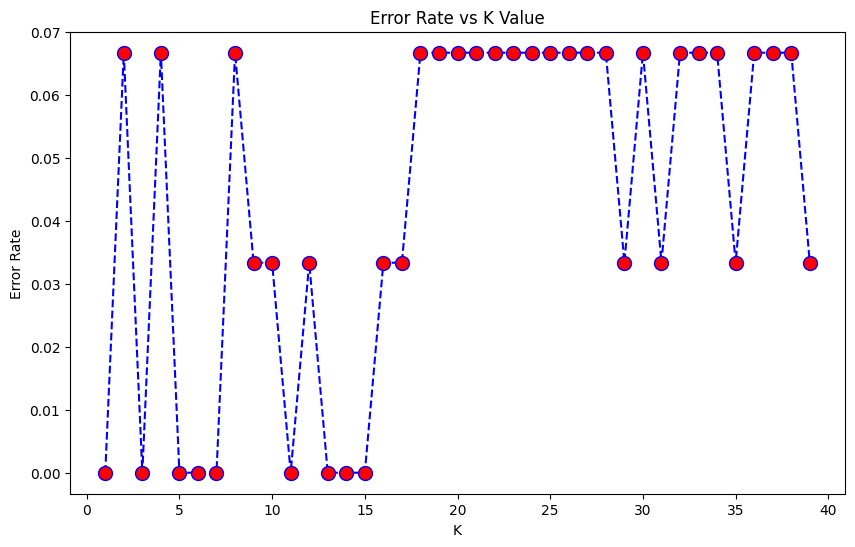

In [15]:
#plot the elbow method to find the best k value
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

